# Vizualizace 

1. Matplotlib a Seaborn
2. Line, scatter, bar 
3. Histogram, boxplot, regrese
4. Correlation heatmap
5. Sankey

In [10]:
import pandas as pd
import scipy.stats as st

In [6]:
# Import visualization tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100 # bigger figures, yayy!

In [7]:
pokemon_df = pd.read_csv("data/Pokemon.csv")

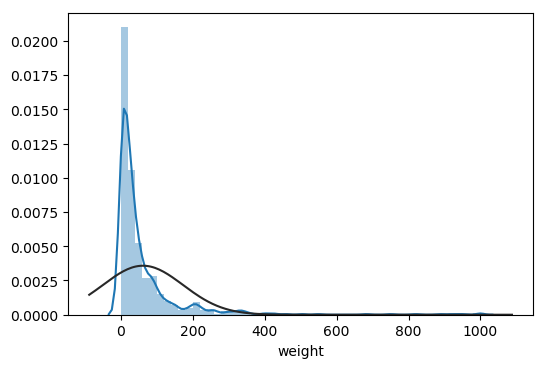

In [11]:
sns.distplot(pokemon_df["weight"], fit=st.norm)

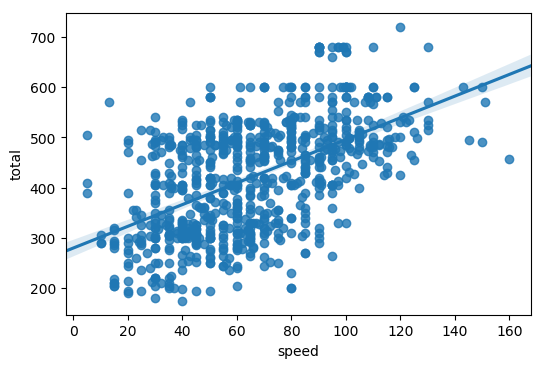

In [12]:
sns.regplot(x="speed", y="total", data=pokemon_df)